In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>")) 
import pandas as pd
from obspy.clients.fdsn import Client
from glob import glob
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [5]:
# Read in stations for which we have station csv information for
df = pd.read_csv(r"Supplementary Files/Table S1 - Lockdown stations.csv", encoding='latin-1')
df_no_ld = pd.read_csv(r"Supplementary Files/Table S2 - Stations without lockdown.csv", encoding='latin-1',)
df_gaps =  pd.read_csv(r"Supplementary Files/Table S3 - Stations with datagaps.csv", encoding='latin-1',)
print("Number of total stations analysed = {:}".format(len(df)+len(df_no_ld)+len(df_gaps)))
print("Number of stations with usable data = {:}".format(len(df)+len(df_no_ld)))
print("Number of stations with lockdown signal = {:}".format(len(df)))

Number of total stations analysed = 337
Number of stations with usable data = 268
Number of stations with lockdown signal = 185


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


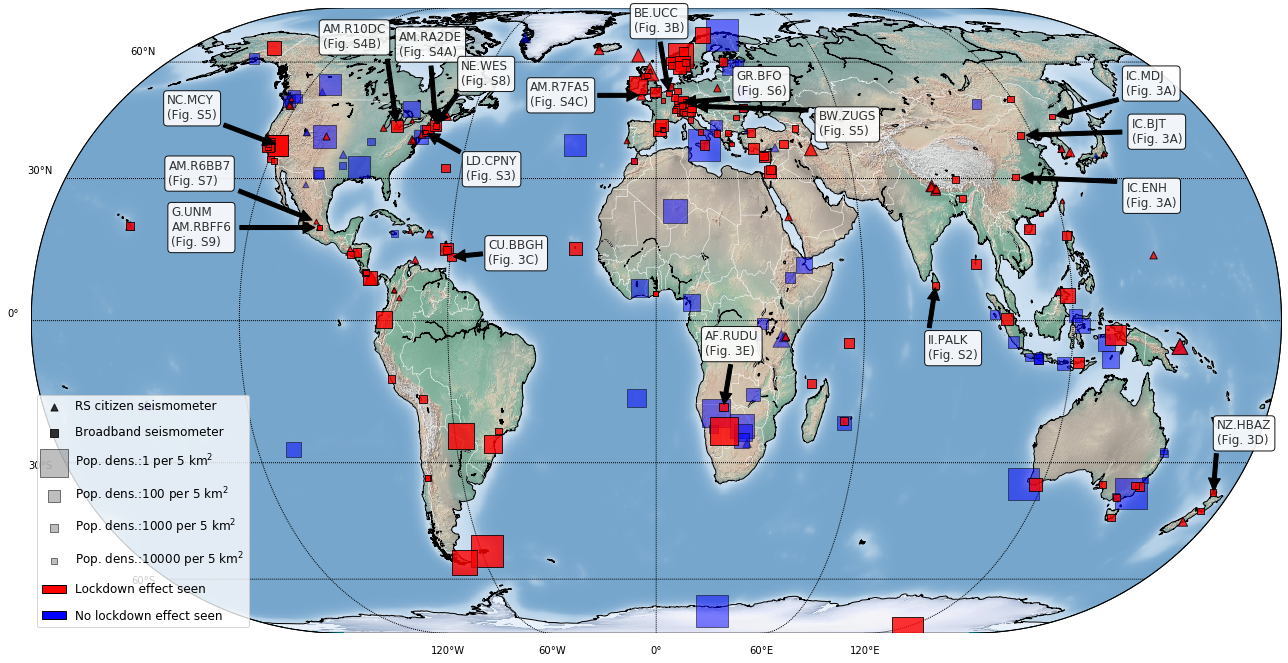

In [6]:
# Now make the map!
fig = plt.figure(figsize=(18,12))
map = Basemap(projection='eck4',lon_0=0, resolution="l")
# plot coastlines, draw label meridians and parallels.
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='gray',lake_color='aqua')
map.shadedrelief(scale=0.25)
map.drawcoastlines()
map.drawcountries(color="white")


SIZE=80

ax = plt.subplot(111)

# Stations without lockdown
df_nold_rs = df_no_ld[df_no_ld["Station_Code"].str[0:2] == "AM"]
df_nold_rs_x, df_nold_rs_y = map(df_nold_rs["longitude"].to_list(), df_nold_rs["latitude"].to_list())
pop = (1000/((df_nold_rs["pop_den_2.5min"]+1)**0.4)).to_list()
ax.scatter(df_nold_rs_x, df_nold_rs_y, pop ,marker='^',color='blue',alpha=0.5, zorder=10, edgecolor="k")
df_nold_bb = df_no_ld[df_no_ld["Station_Code"].str[0:2] != "AM"]
pop = (1000/((df_nold_bb["pop_den_2.5min"]+1)**0.4)).to_list()
df_nold_bb_x, df_nold_bb_y = map(df_nold_bb["longitude"].to_list(), df_nold_bb["latitude"].to_list())
ax.scatter(df_nold_bb_x, df_nold_bb_y, pop ,marker='s',color='blue',alpha=0.5, zorder=10, edgecolor="k")

# Stations with lockdown
df_ld_rs = df[df["Station_Code"].str[0:2] == "AM"]
df_ld_rs = df_ld_rs.sort_values(by="pop_den_2.5min")
df_ld_rs_x, df_ld_rs_y = map(df_ld_rs["longitude"].to_list(), df_ld_rs["latitude"].to_list())
pop = (1000/((df_ld_rs["pop_den_2.5min"]+1)**0.4)).to_list()
ax.scatter(df_ld_rs_x, df_ld_rs_y, pop ,marker='^',color='red',alpha=0.8, zorder=10, edgecolor="k", label="RS citizen seismometer")
df_ld_bb = df[df["Station_Code"].str[0:2] != "AM"]
df_ld_bb = df_ld_bb.sort_values(by="pop_den_2.5min")
df_ld_bb_x, df_ld_bb_y = map(df_ld_bb["longitude"].to_list(), df_ld_bb["latitude"].to_list())
pop = (1000/((df_ld_bb["pop_den_2.5min"]+1)**0.4)).to_list()
ax.scatter(df_ld_bb_x, df_ld_bb_y, pop ,marker='s',color='red',alpha=0.8, zorder=10, edgecolor="k", label="Broadband seismometer")

for sta_labl in [
                 ["(Fig. 3A)", "IC.BJT", 3000000, 100000],
                 ["(Fig. 3A)", "IC.ENH", 3000000, -500000],
                 ["(Fig. 3A)", "IC.MDJ", 2000000, 900000],
                 ["(Fig. 3B)", "BE.UCC", -950000, 1950000],
                 ["(Fig. 3C)", "CU.BBGH", 1000000, 100000],
                 ["(Fig. 3D)", "NZ.HBAZ", 100000, 1600000],
                 ["(Fig. 3E)", "AF.RUDU", -500000, 1700000],
                 ["(Fig. S2)", "II.PALK", -200000, -1700000],
                 ["(Fig. S3)", "LD.CPNY", 1100000, -1000000],
                 ["(Fig. S4A)", "AM.RA2DE", -1000000, 2200000],
                 ["(Fig. S4B)", "AM.R10DC", -2000000, 2400000],
                 ["(Fig. S4C)", "AM.R7FA5", -3000000, 0],
                 ["(Fig. S5)", "NC.MCY", -3000000, 1000000],
                 ["(Fig. S5)", "BW.ZUGS", 3500000, -500000],
                 ["(Fig. S6)", "GR.BFO", 1500000, 500000],
                 ["(Fig. S7)", "AM.R6BB7", -4000000, 1300000],             
                 ["(Fig. S8)", "NE.WES", 700000, 1400000],
                 ["AM.RBFF6\n(Fig. S9)", "G.UNM", -4000000, 0],
                ]:
    df_lab = df[df["Station_Code"] == sta_labl[1]]
    x, y = map(df_lab["longitude"].to_list(), df_lab["latitude"].to_list())
    ax.annotate(xy=(x[0], y[0]), va="center", xytext=(x[0]+sta_labl[2], y[0]+sta_labl[3]), 
                s=sta_labl[1]+'\n' +sta_labl[0], alpha=0.8, fontsize=12,
               arrowprops=dict(facecolor='black', shrink=0.05),
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.9), zorder=20)
    
pop = [1, 100, 1000, 10000]
sizes = [1000/((p+1)**0.4) for p in pop]
for i in range(len(pop)):
    ax.scatter(-100000000, -100000000, s=sizes[i], alpha=0.5, label="Pop. dens.:{:} per 5 km$^2$".format(pop[i]), marker="s", facecolor="gray", edgecolor="k")

handles, labels = ax.get_legend_handles_labels()

red_patch = mpatches.Patch(facecolor='red', label='Lockdown effect seen' , edgecolor="k", lw=1)
white_patch = mpatches.Patch(facecolor='blue', label='No lockdown effect seen', edgecolor="k", lw=1)
handles.append(red_patch)
handles.append(white_patch)

leg = ax.legend(handles=handles, labelspacing=1.1, loc="lower left", fontsize=12, framealpha=.8)

leg.legendHandles[0].set_color('k')
leg.legendHandles[0]._sizes = [50]
leg.legendHandles[1]._sizes = [50]
leg.legendHandles[1].set_color('k')
leg.set_zorder(100)
plt.tight_layout()
plt.savefig("Figure1.pdf", bbox_inches = 'tight')
plt.show()
